In [1]:
# numpy
import numpy as np

# pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt             # pylab도 많이 쓰임

#seaborn
import seaborn as sns

# 한글 폰트 관리! 
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc('font',family=font_name)
mpl.rcParams["axes.unicode_minus"]=False

In [58]:
# 데이터 불러오기
data = pd.read_csv("data_csv/클러스터링용/olds_population(cp949).csv", encoding="cp949")
data

,period,gu,dong,pop,olds,male_olds,female_olds,proportion
0,2010.1/4,합계,합계,10464171,949680,408178,541502,9.08
1,2010.1/4,종로구,사직동,10433,1392,596,796,13.34
2,2010.1/4,종로구,삼청동,3689,557,236,321,15.10
3,2010.1/4,종로구,부암동,11566,1456,677,779,12.59
4,2010.1/4,종로구,평창동,19713,2346,1000,1346,11.90
...,...,...,...,...,...,...,...,...
17409,2020.1/4,강동구,둔촌1동,279,95,35,60,34.05
17410,2020.1/4,강동구,둔촌2동,27520,4123,1917,2206,14.98
17411,2020.1/4,강동구,암사1동,36492,5751,2509,3242,15.76
17412,2020.1/4,강동구,천호2동,35714,5815,2628,3187,16.28


In [3]:
# 구 이름 확인
data["gu"].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '총계'],
      dtype=object)

In [4]:
# 동 이름 확인
data["dong"].unique()

array(['합계', '소계', '사직동', '삼청동', '부암동', '평창동', '무악동', '교남동', '가회동',
       '종로1.2.3.4가동', '종로5·6가동', '이화동', '혜화동', '명륜3가동', '창신1동', '창신2동',
       '창신3동', '숭인1동', '숭인2동', '청운효자동', '소공동', '회현동', '명동', '필동', '장충동',
       '광희동', '을지로동', '신당1동', '신당2동', '신당3동', '신당4동', '신당5동', '신당6동',
       '황학동', '중림동', '후암동', '용산2가동', '남영동', '원효로2동', '효창동', '용문동', '이촌1동',
       '이촌2동', '이태원1동', '이태원2동', '서빙고동', '보광동', '청파동', '원효로1동', '한강로동',
       '한남동', '왕십리2동', '마장동', '사근동', '행당1동', '행당2동', '응봉동', '금호1가동',
       '금호4가동', '성수1가1동', '성수1가2동', '성수2가1동', '성수2가3동', '송정동', '용답동',
       '왕십리도선동', '금호2.3가동', '옥수동', '화양동', '군자동', '중곡1동', '중곡2동', '중곡3동',
       '중곡4동', '능동', '구의1동', '구의2동', '구의3동', '광장동', '자양1동', '자양2동',
       '자양3동', '자양4동', '회기동', '휘경1동', '휘경2동', '청량리동', '용신동', '제기동',
       '전농1동', '전농2동', '답십리1동', '답십리2동', '장안1동', '장안2동', '이문1동', '이문2동',
       '면목2동', '면목4동', '면목5동', '면목7동', '상봉1동', '상봉2동', '중화1동', '중화2동',
       '묵1동', '묵2동', '망우3동', '신내1동', '신내2동', '면목본동', '면목3.8동', '망우본동',
       

In [59]:
# 구별/동별로 재정렬
df_gu_dong = data.sort_values(by=["gu", "dong"], axis=0)
df_gu_dong

,period,gu,dong,pop,olds,male_olds,female_olds,proportion
370,2010.1/4,강남구,개포1동,22425,1495,641,854,6.67
795,2010.2/4,강남구,개포1동,22316,1516,645,871,6.79
1220,2010.3/4,강남구,개포1동,22177,1528,647,881,6.89
1645,2010.4/4,강남구,개포1동,22338,1570,661,909,7.03
2070,2011.1/4,강남구,개포1동,22111,1605,681,924,7.26
...,...,...,...,...,...,...,...,...
15288,2019.1/4,합계,합계,10054979,1436125,634125,802000,14.28
15713,2019.2/4,합계,합계,10041574,1451564,640905,810659,14.46
16138,2019.3/4,합계,합계,10025927,1468146,648586,819560,14.64
16563,2019.4/4,합계,합계,10010983,1485272,656595,828677,14.84


In [6]:
"""
columns설명
1) period : 분기 (연도 + 분기)
2) gu : 구
3) dong : 동 (행정동)
4) pop : 전체 인구
5) olds : 65세 이상 인구
6) male_olds : 65세 이상 남성 인구
7) female_olds : 65세 이상 여성 인구
8) proportion : 전체인구 대비 노인인구 비율 (%)

row 설명
1) gu - 합계 : 서울특별시시 전체 합계 데이터
2) dong - 소계 : 구별 합계 데이터
"""

'\ncolumns설명\n1) period : 분기 (연도 + 분기)\n2) gu : 구\n3) dong : 동 (행정동)\n4) pop : 전체 인구\n5) olds : 65세 이상 인구\n6) male_olds : 65세 이상 남성 인구\n7) female_olds : 65세 이상 여성 인구\n8) proportion : 전체인구 대비 노인인구 비율 (%)\n\nrow 설명\n1) gu - 합계 : 서울특별시시 전체 합계 데이터\n2) dong - 소계 : 구별 합계 데이터\n'

In [95]:
# 분기별로 합계 구해서 새로운 데이터 프레임 만들기
# -> 서울시 전체 노인인구 변동 추이 파악 
df_total = df_gu_dong.groupby(by = ["period"]).sum()
df_total.reset_index(level=['period'], inplace = True)
df_total

,period,pop,olds,male_olds,female_olds,proportion
0,2010.1/4,20928342,1899360,816356,1083004,3974.88
1,2010.2/4,20895438,1920768,826724,1094044,4025.98
2,2010.3/4,20874652,1938110,835304,1102806,4067.44
3,2010.4/4,21150894,2005540,866644,1138896,4163.82
4,2011.1/4,21163456,2037068,881524,1155544,4227.40
5,2011.2/4,21140128,2051230,887910,1163320,4259.30
6,2011.3/4,21114995,2076300,899860,1176440,4317.56
7,2011.4/4,21057548,2098850,910604,1188246,4374.64
8,2012.1/4,21039450,2142319,931475,1210844,4466.24
9,2012.2/4,20997349,2166926,942825,1224101,4526.34


In [115]:
# 중간 저장 (2010~2020 분기별 서울시 인구자료)
# df_total.to_csv("data_csv/서울특별시분기별인구_10개년.csv", encoding="cp949", index = False)

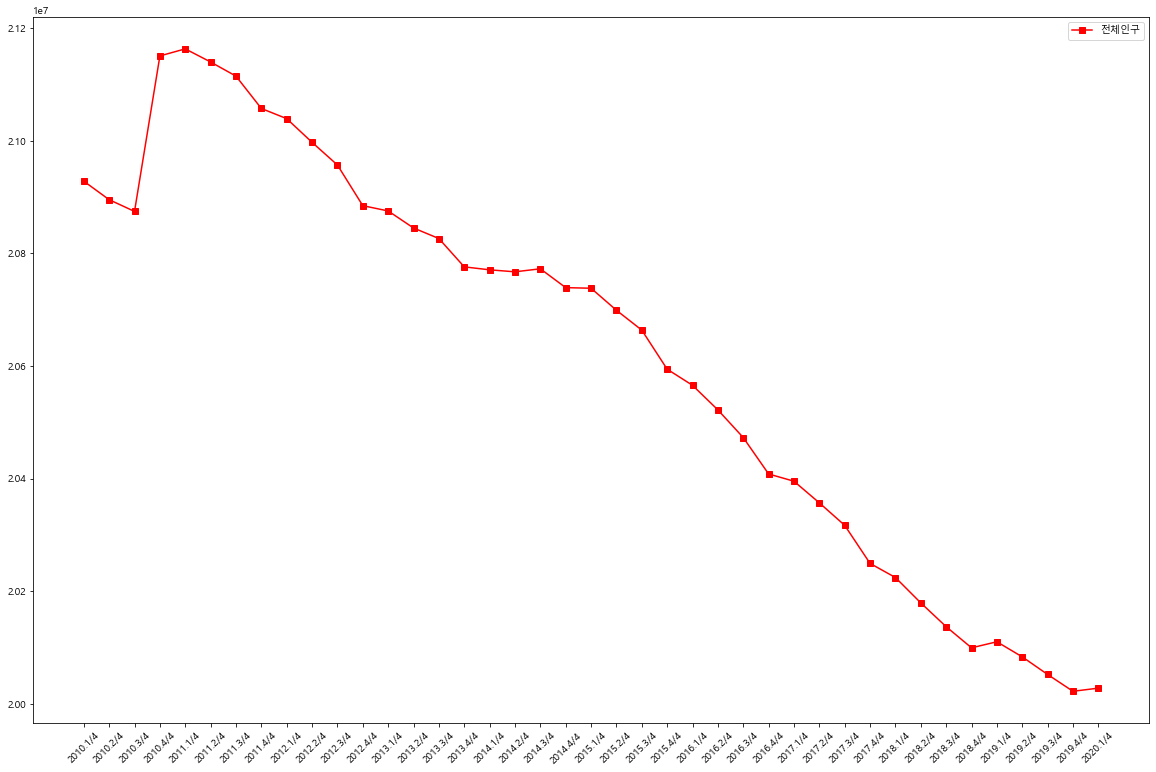

In [96]:
# 선그래프로 추이 파악 (전체인구)
fig = plt.figure(figsize=[20,13])

plt.plot(df_total["period"], df_total["pop"], marker='s', color='r', label="전체인구")
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()

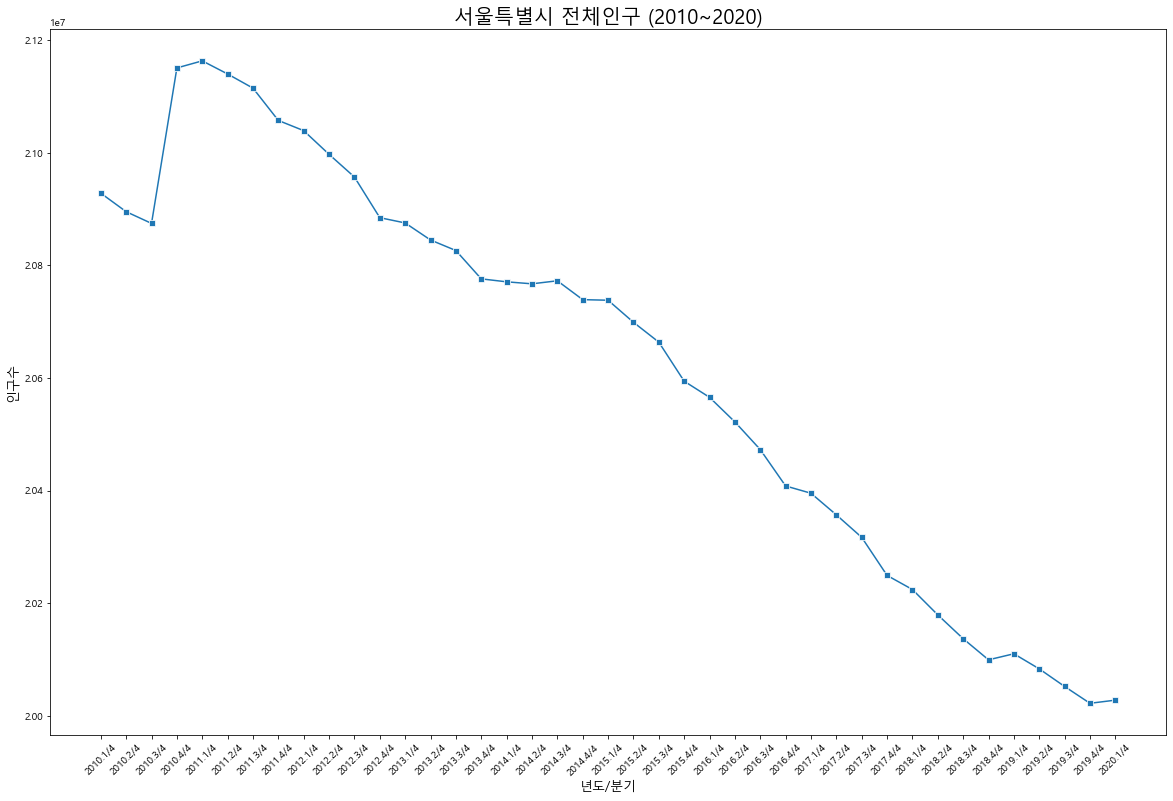

In [97]:
a4_dims = (20,13)
fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(x= "period", y='pop', data=df_total, marker='s')

# x,y 축 이름
ax.set_xlabel('년도/분기' ,fontsize='13')
ax.set_ylabel('인구수' ,fontsize='13')

# x축 라벨들 45도 삐딱하게
plt.xticks(rotation=45)

# 그래프 타이틀
plt.title("서울특별시 전체인구 (2010~2020)", fontsize='20')

# 보여주기
plt.show()

In [86]:
# 저장
# ax.figure.savefig('시각화/인구/서울특별시_전체인구(2010~2020).png')

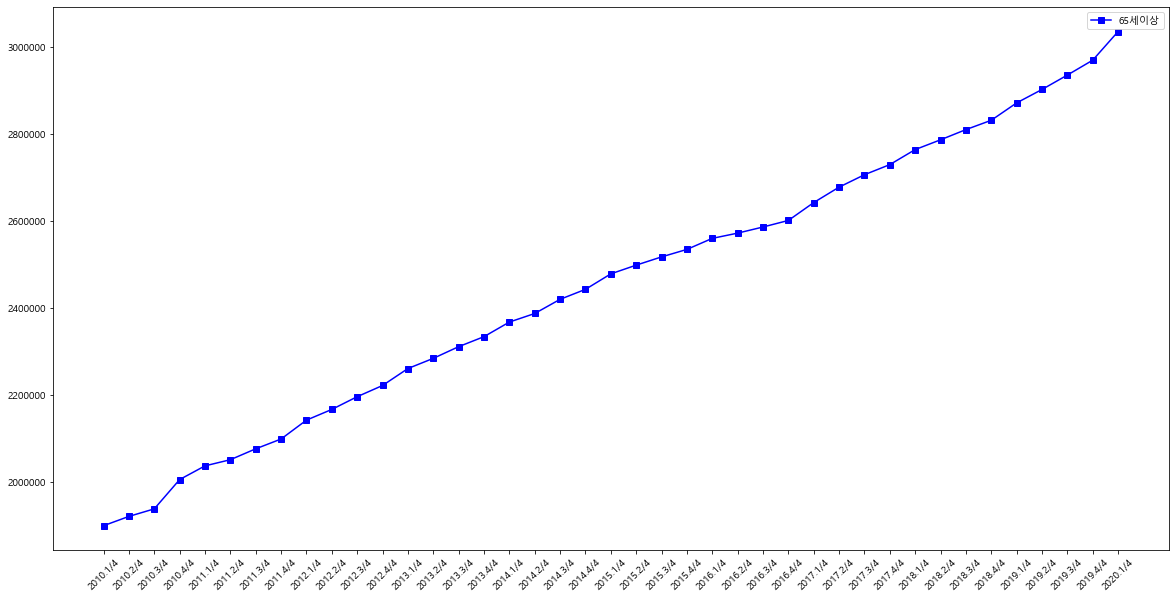

In [98]:
# 선그래프로 추이 파악 (노인인구)
fig = plt.figure(figsize=[20,10])
plt.plot(df_total["period"], df_total["olds"], marker='s', color='b', label="65세이상")
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()

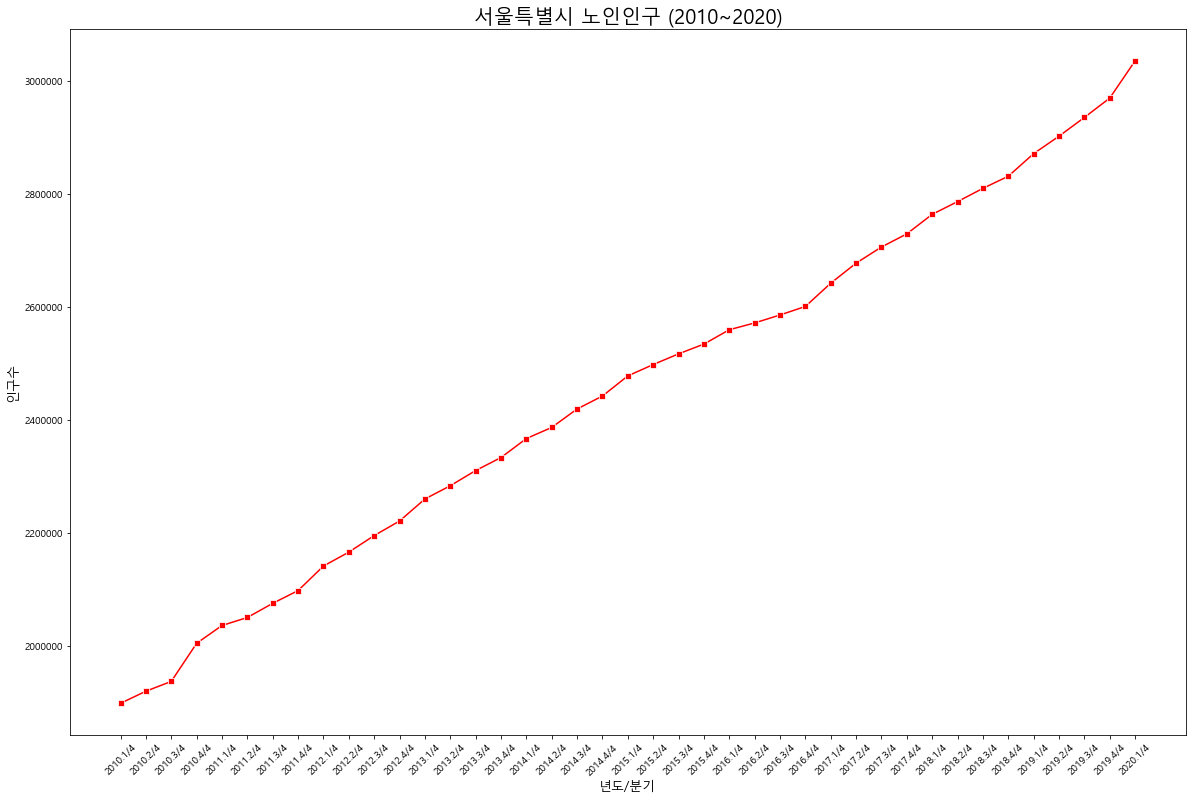

In [99]:
a4_dims = (20,13)
fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(x= "period", y='olds', data=df_total, marker='s',color='r' )

# x,y 축 이름
ax.set_xlabel('년도/분기' ,fontsize='13')
ax.set_ylabel('인구수' ,fontsize='13')

# x축 라벨들 45도 삐딱하게
plt.xticks(rotation=45)

# 그래프 타이틀
plt.title("서울특별시 노인인구 (2010~2020)", fontsize='20')

# 보여주기
plt.show()

In [91]:
# 저장
# ax.figure.savefig('시각화/인구/서울특별시_노인인구(2010~2020).png')

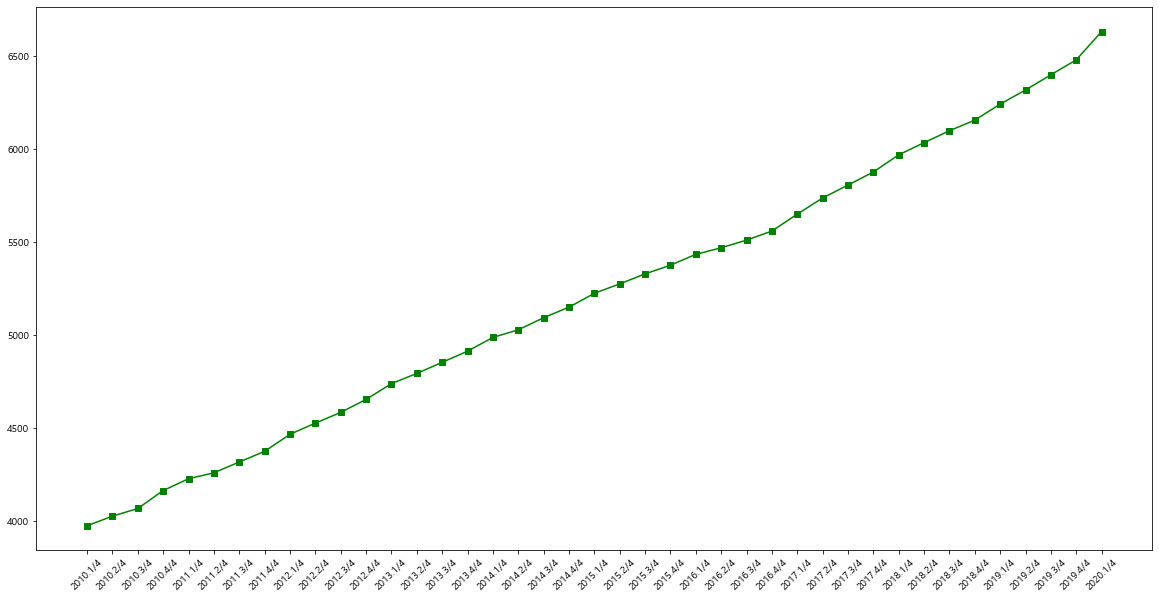

In [100]:
# 선그래프로 추이 파악 (비율변화)
fig = plt.figure(figsize=[20,10])
plt.plot(df_total["period"], df_total["proportion"], marker='s', color='g')
plt.xticks(rotation=45)
plt.show()

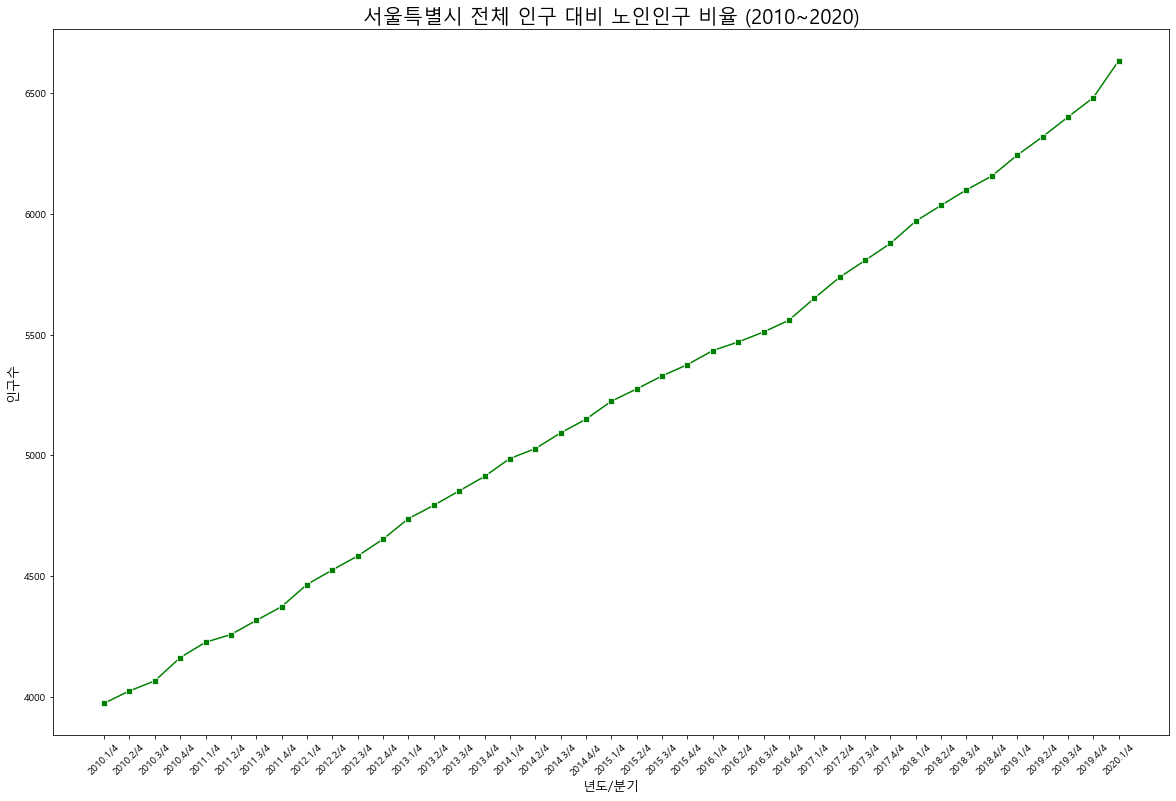

In [101]:
a4_dims = (20,13)
fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(x= "period", y='proportion', data=df_total, marker='s',color='g' )

# x,y 축 이름
ax.set_xlabel('년도/분기' ,fontsize='13')
ax.set_ylabel('인구수' ,fontsize='13')

# x축 라벨들 45도 삐딱하게
plt.xticks(rotation=45)

# 그래프 타이틀
plt.title("서울특별시 전체 인구 대비 노인인구 비율 (2010~2020)", fontsize='20')

# 보여주기
plt.show()

In [94]:
# 저장
# ax.figure.savefig('시각화/인구/서울특별시_노인인구비율(2010~2020).png')

In [151]:
# 분기별 - 구별 인구 합계
df_gu_total = df_gu_dong.groupby(by = ["period","gu"]).sum()
df_gu_total.reset_index(level=['period'], inplace = True)
df_gu_total.reset_index(level=['gu'], inplace = True)
df_gu_total = df_gu_total[(df_gu_total["gu"]!="합계") & (df_gu_total["gu"]!="총계")]
df_gu_total

,gu,period,pop,olds,male_olds,female_olds,proportion
0,강남구,2010.1/4,570913,41760,18168,23592,171.01
1,강동구,2010.1/4,490945,37115,15516,21599,133.94
2,강북구,2010.1/4,342669,39227,17309,21918,149.21
3,강서구,2010.1/4,578257,48068,19860,28208,170.15
4,관악구,2010.1/4,546814,47554,21426,26128,181.98
...,...,...,...,...,...,...,...
1060,용산구,2020.1/4,246165,39439,16753,22686,261.53
1061,은평구,2020.1/4,482509,82245,35610,46635,278.69
1062,종로구,2020.1/4,161984,28073,12459,15614,307.64
1063,중구,2020.1/4,136469,23794,10495,13299,266.16


In [116]:
# 중간 저장 (2010~2020 분기별 서울시 인구자료)
# df_gu_total.to_csv("data_csv/서울특별시분기별인구(구별구분)_10개년.csv", encoding="cp949", index = False)

In [152]:
# 반복분을 위해 구 이름 추출
gu_name = list(df_gu_total["gu"].unique())
len(gu_name)   # 25개 OK

25

In [153]:
# 선 색상 구분을 위해 list
color_list = ["dimgray", "lightgray","brown","red","tomato", "sienna", "peru", "burlywood", "gold", "darkkhaki", "olive", 
              "darkolivegreen", "palegreen", "limegreen", "aquamarine", "darkslategray","cyan", "deepskyblue", "cornflowerblue",
              "navy", "darkslateblue", "indigo", "fuchsia", "hotpink", "black"]
len(color)

25

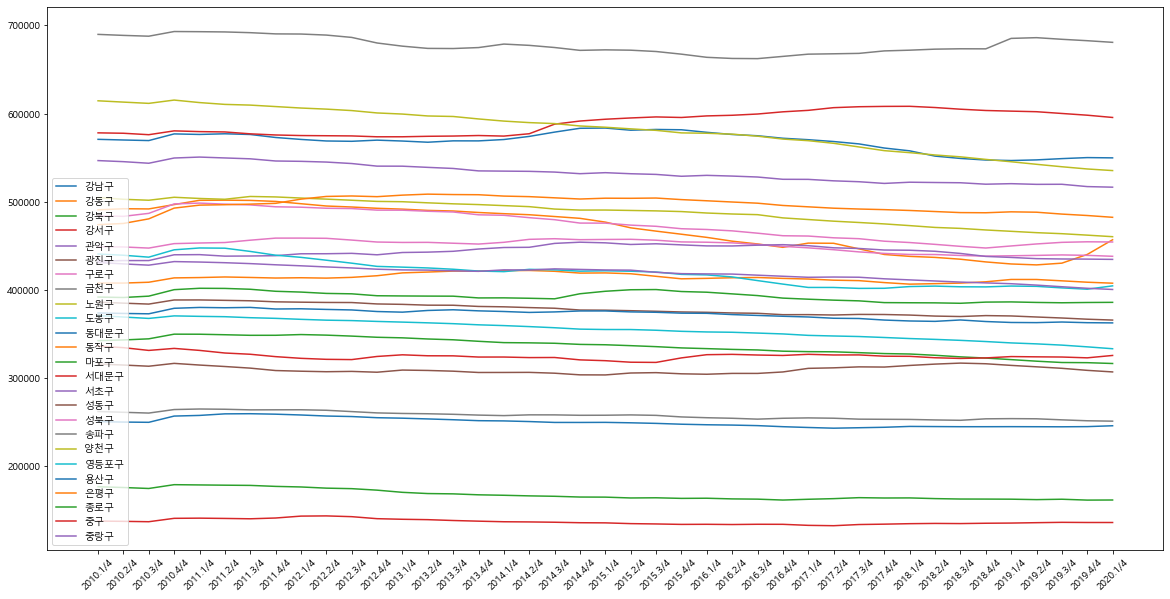

In [158]:
# 선그래프로 추이 파악 (구별 인구 소계)
gu_name = list(df_gu_total["gu"].unique())
fig = plt.figure(figsize=[20,10])

for name, col in zip(gu_name, color):
    df_gu_total_sub = df_gu_total[df_gu_total["gu"]==name]
    plt.plot(df_gu_total_sub["period"], df_gu_total_sub["pop"], label=name)

plt.legend(loc="best")
plt.xticks(rotation=45)

# x,y 축 이름
ax.set_xlabel('년도/분기' ,fontsize='13')
ax.set_ylabel('인구 수 (명)' ,fontsize='13')

plt.show()

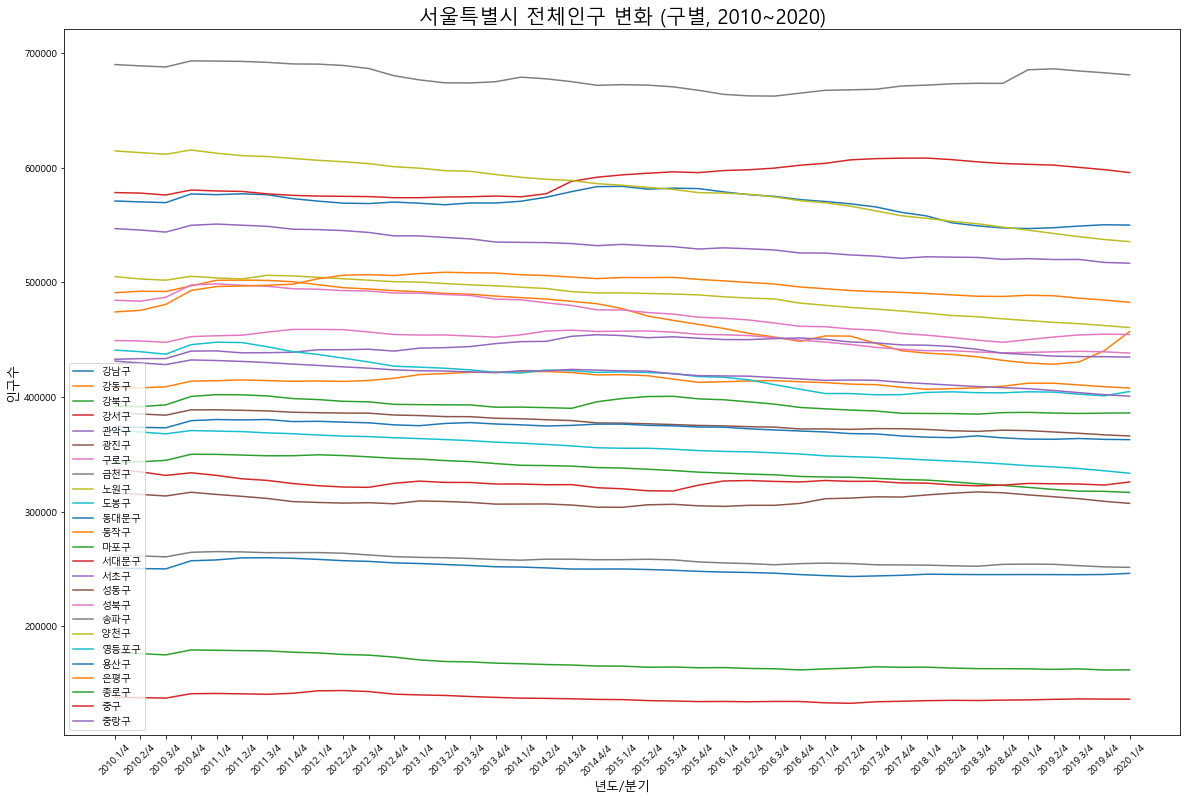

In [159]:
a4_dims = (20,13)
fig, ax = plt.subplots(figsize=a4_dims)

for name in gu_name:
    df_gu_total_sub = df_gu_total[df_gu_total["gu"]==name]
    sns.lineplot(x= "period", y='pop', data=df_gu_total_sub, palette="Paired", label=name) 
    
# x,y 축 이름
ax.set_xlabel('년도/분기' ,fontsize='13')
ax.set_ylabel('인구수' ,fontsize='13')

# x축 라벨들 45도 삐딱하게
plt.xticks(rotation=45)

# 그래프 타이틀
plt.title("서울특별시 전체인구 변화 (구별, 2010~2020)", fontsize='20')

# 구 이름 목록
ax.legend(loc='best')

# 보여주기
plt.show()

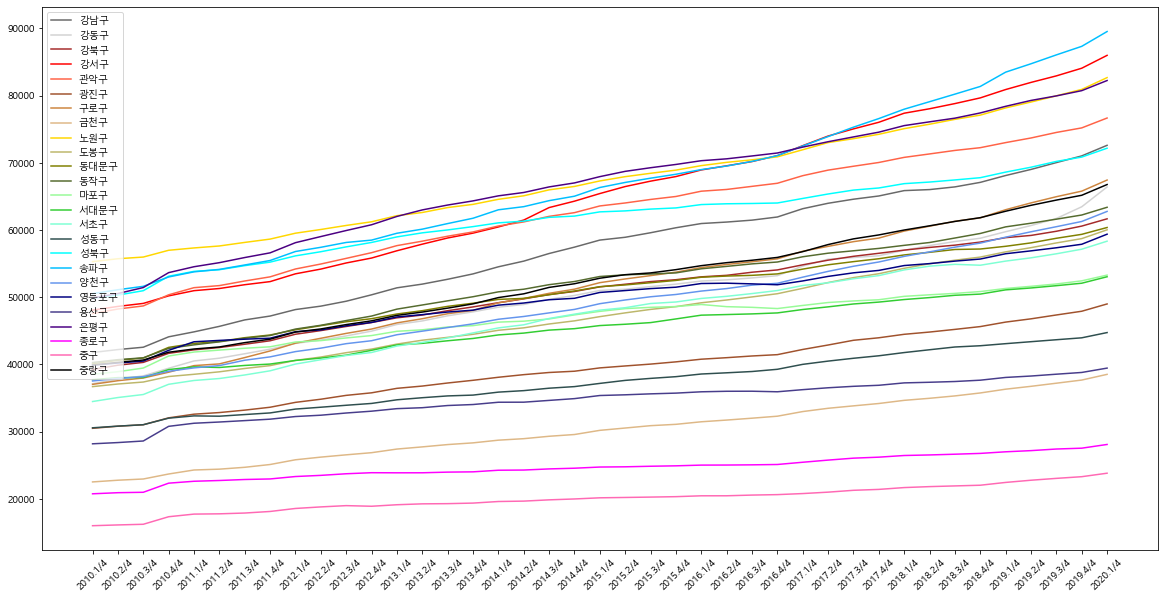

In [160]:
# 선그래프로 추이 파악 (구별 노인인구 소계)
fig = plt.figure(figsize=[20,10])

for name, col in zip(gu_name, color):
    gu_total_sub = gu_total[gu_total["gu"]==name]
    plt.plot(gu_total_sub["period"], gu_total_sub["olds"], color=col, label=name)

plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()

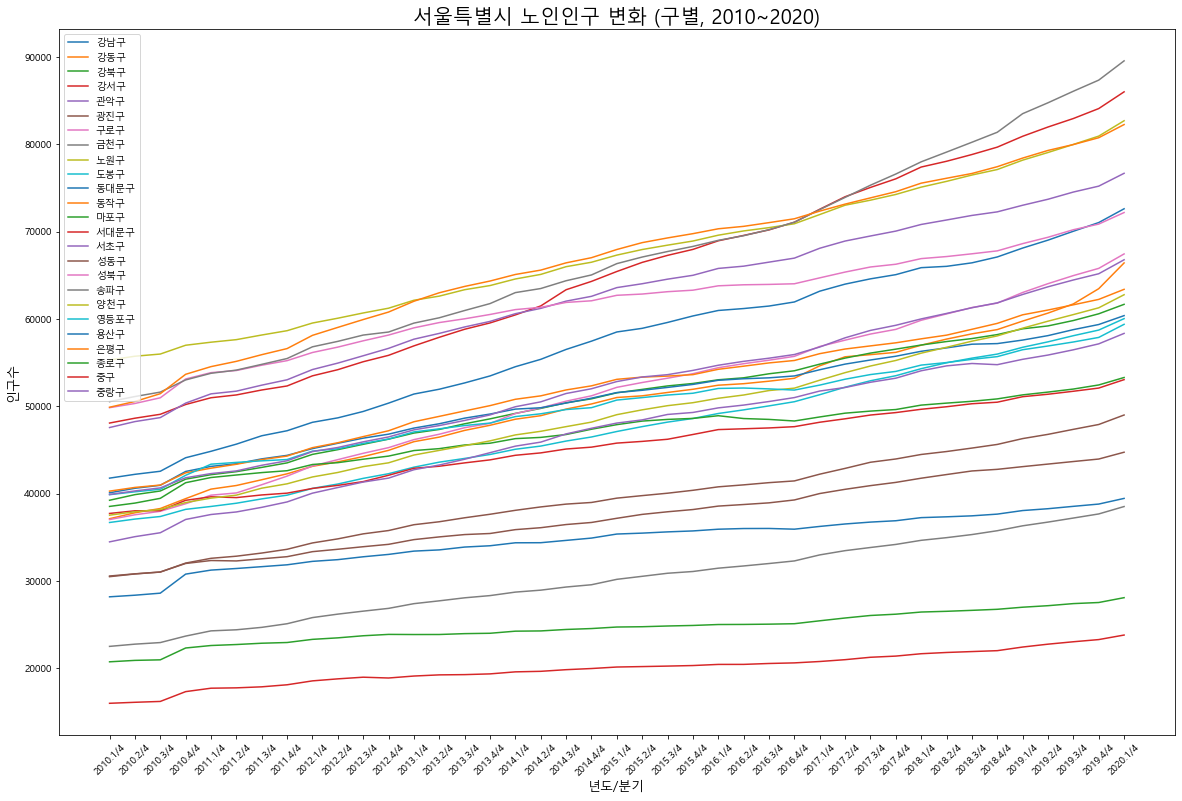

In [161]:
a4_dims = (20,13)
fig, ax = plt.subplots(figsize=a4_dims)

for name in gu_name:
    df_gu_total_sub = df_gu_total[df_gu_total["gu"]==name]
    sns.lineplot(x= "period", y='olds', data=df_gu_total_sub, palette="Paired", label=name) 
    
# x,y 축 이름
ax.set_xlabel('년도/분기' ,fontsize='13')
ax.set_ylabel('인구수' ,fontsize='13')

# x축 라벨들 45도 삐딱하게
plt.xticks(rotation=45)

# 그래프 타이틀
plt.title("서울특별시 노인인구 변화 (구별, 2010~2020)", fontsize='20')

# 구 이름 목록
ax.legend(loc='best')

# 보여주기
plt.show()

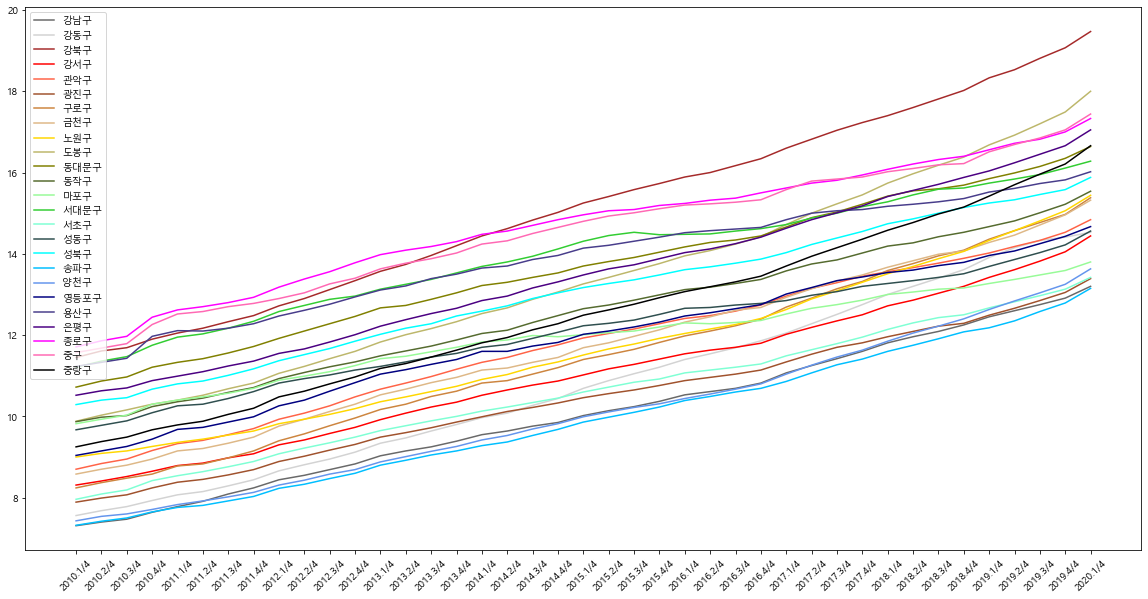

In [20]:
# 선그래프로 추이 파악 (구별 증감 비율)
fig = plt.figure(figsize=[20,10])

for name, col in zip(gu_name, color):
    gu_total_sub = gu_total[gu_total["gu"]==name]
    plt.plot(gu_total_sub["period"], gu_total_sub["proportion"], color=col, label=name)

plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()

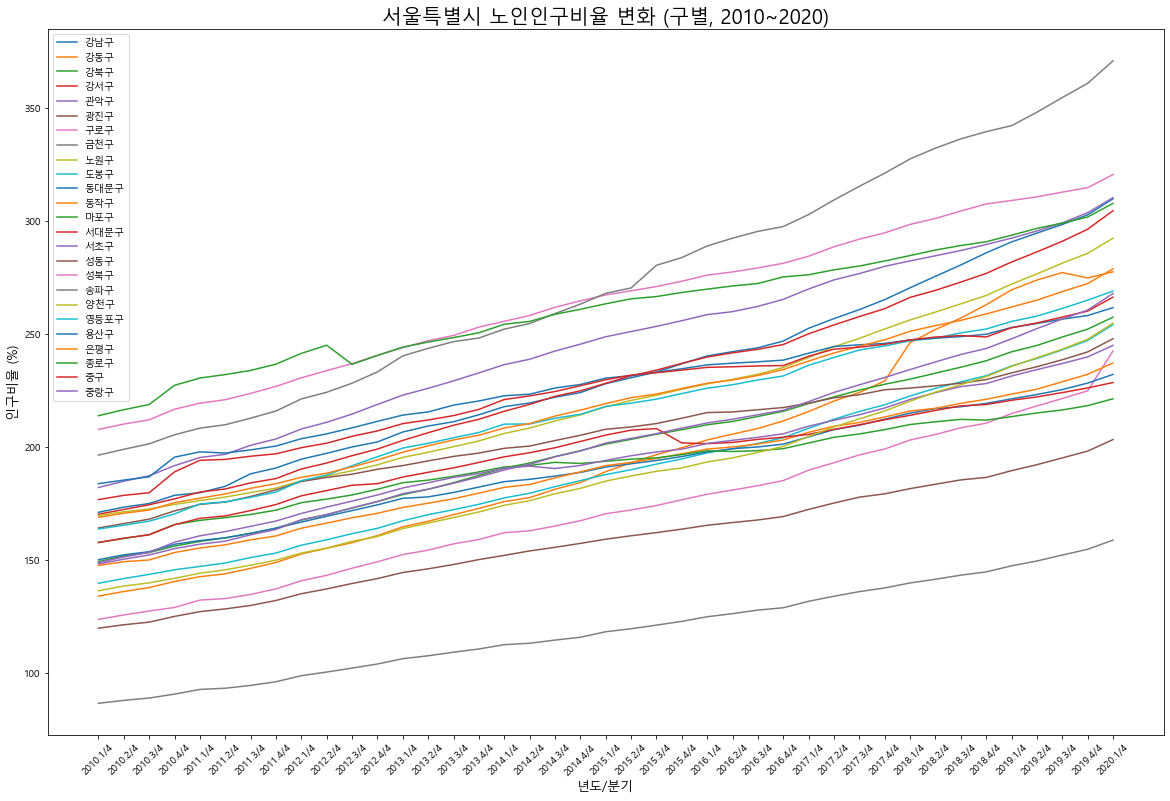

In [162]:
a4_dims = (20,13)
fig, ax = plt.subplots(figsize=a4_dims)

for name in gu_name:
    df_gu_total_sub = df_gu_total[df_gu_total["gu"]==name]
    sns.lineplot(x= "period", y='proportion', data=df_gu_total_sub, palette="Paired", label=name) 
    
# x,y 축 이름
ax.set_xlabel('년도/분기' ,fontsize='13')
ax.set_ylabel('인구비율 (%)' ,fontsize='13')

# x축 라벨들 45도 삐딱하게
plt.xticks(rotation=45)

# 그래프 타이틀
plt.title("서울특별시 노인인구비율 변화 (구별, 2010~2020)", fontsize='20')

# 구 이름 목록
ax.legend(loc='best')

# 보여주기
plt.show()

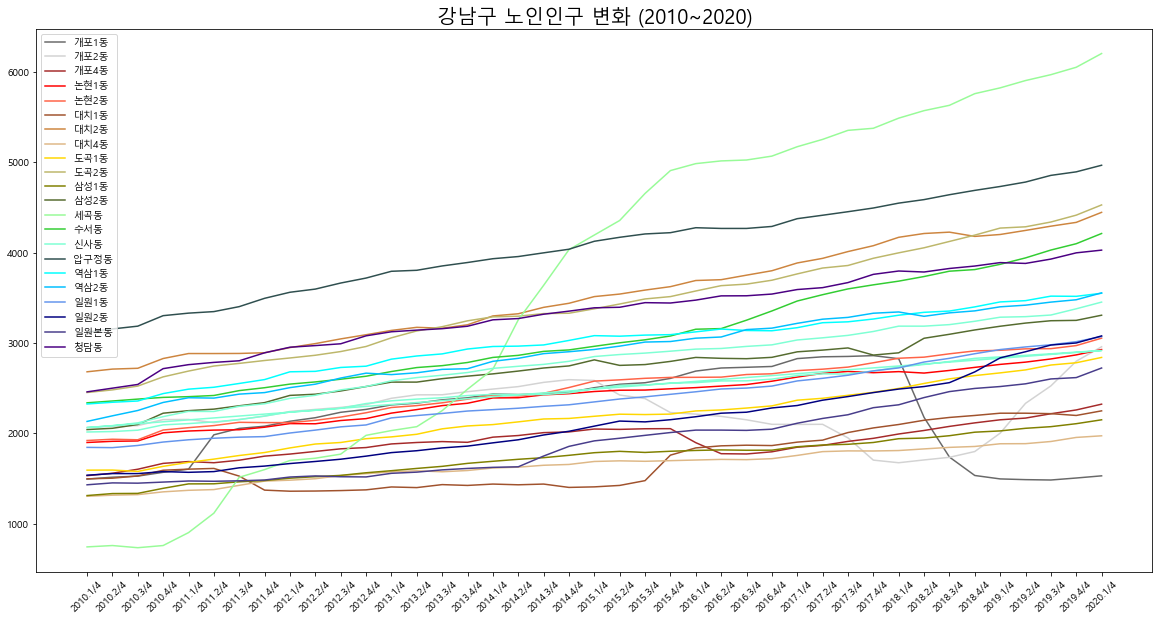

In [163]:
# 병의원, 약국 확인 결과 : 강남구가 1위. 강남구 인구 함께 살펴보기
gangnam = df_gu_dong[(df_gu_dong["gu"]=="강남구") & (df_gu_dong["dong"]!="소계")]["dong"].unique()

# 선그래프로 추이 파악 (동별 노인인구 소계)
fig = plt.figure(figsize=[20,10])

for name, col in zip(gangnam, color):
    df_gu_dong_sub = df_gu_dong[df_gu_dong["dong"]==name]
    plt.plot(df_gu_dong_sub["period"], df_gu_dong_sub["olds"], color=col, label=name)

# 그래프 타이틀
plt.title("강남구 노인인구 변화 (2010~2020)", fontsize='20')
    
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()

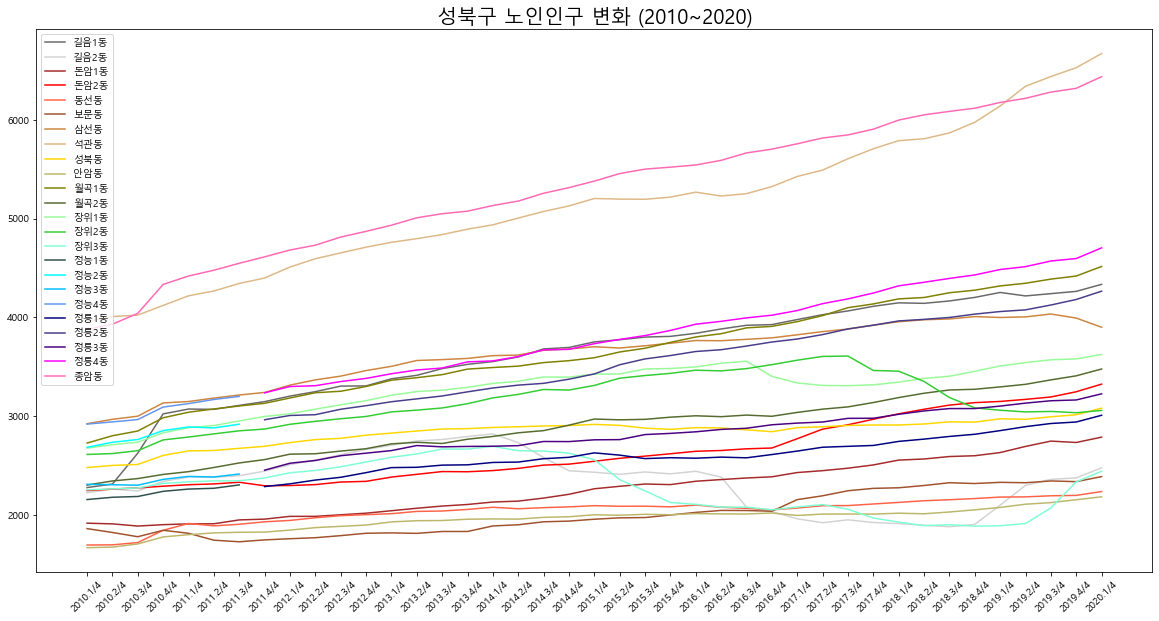

In [164]:
# 병의원, 약국 확인 결과 : 성북구가 25위. 성북구 인구 함께 살펴보기
sungbuk = df_gu_dong[(df_gu_dong["gu"]=="성북구") & (df_gu_dong["dong"]!="소계")]["dong"].unique()


# 선그래프
fig = plt.figure(figsize=[20,10])

for name, col in zip(sungbuk, color):
    df_gu_dong_sub = df_gu_dong[df_gu_dong["dong"]==name]
    plt.plot(df_gu_dong_sub["period"], df_gu_dong_sub["olds"], color=col, label=name)


    
# 그래프 타이틀
plt.title("성북구 노인인구 변화 (2010~2020)", fontsize='20')    
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()

구 이름: 송파구


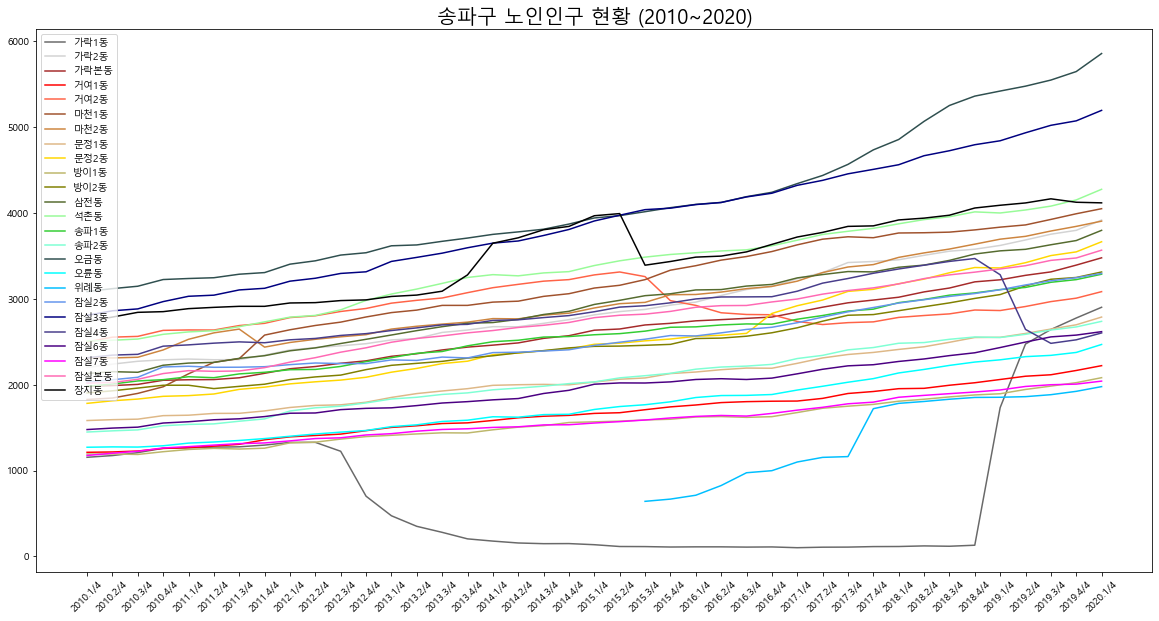

In [165]:
# 기타 살펴보기_구별
gu_name = input('구 이름: ')
gu_tmp = df_gu_dong[(df_gu_dong["gu"]==gu_name) & (df_gu_dong["dong"]!="소계")]["dong"].unique()


# 선그래프
fig = plt.figure(figsize=[20,10])

for name, col in zip(gu_tmp, color):
    df_gu_dong_sub = df_gu_dong[df_gu_dong["dong"]==name]
    plt.plot(df_gu_dong_sub["period"], df_gu_dong_sub["olds"], color=col, label=name)

# x,y 축 이름
ax.set_xlabel('년도/분기' ,fontsize='13')
ax.set_ylabel('인구수' ,fontsize='13')

plt.legend(loc="best")
plt.xticks(rotation=45)
plt.title( gu_name + " 노인인구 현황 (2010~2020)", fontsize='20')
plt.show()

구 이름: 송파구
동 이름: 위례동


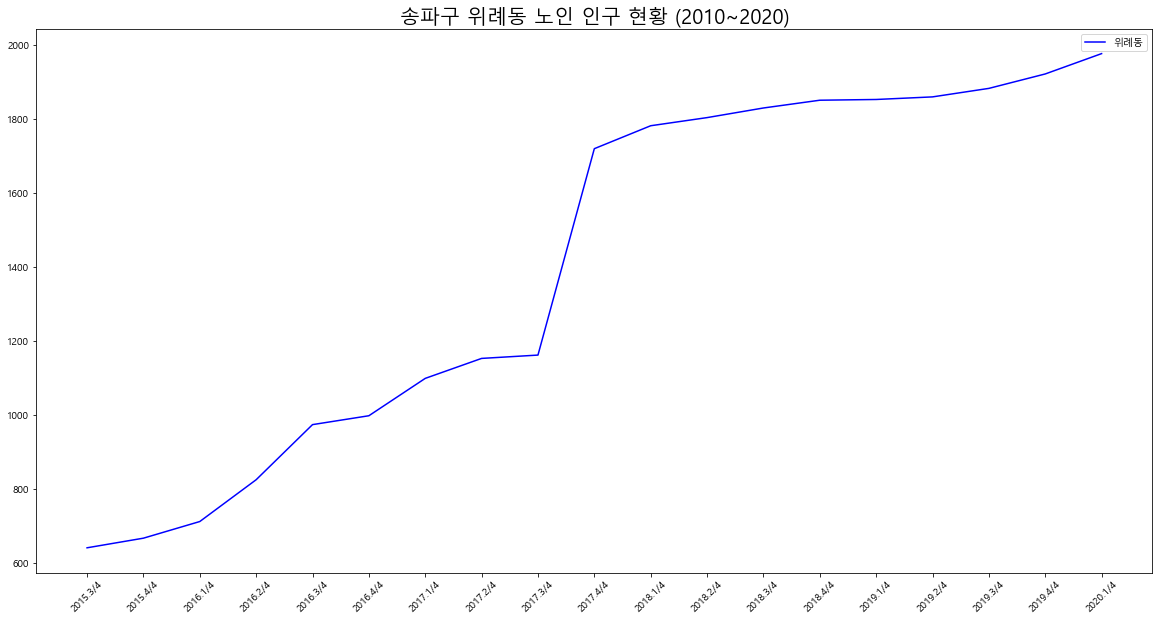

In [167]:
# 기타 살펴보기_행정동별
gu_name = input('구 이름: ')
dong_name = input('동 이름: ')

# 선그래프
fig = plt.figure(figsize=[20,10])

df_gu_dong_sub = df_gu_dong[df_gu_dong["dong"]== dong_name]
plt.plot(df_gu_dong_sub["period"], df_gu_dong_sub["olds"], color="blue", label=dong_name)

# x,y 축 이름
ax.set_xlabel('년도/분기' ,fontsize='13')
ax.set_ylabel('인구수' ,fontsize='13')

plt.legend(loc="best")
plt.xticks(rotation=45)
plt.title( gu_name+" "+dong_name+" 노인 인구 현황 (2010~2020)", fontsize='20')
plt.show()